<a href="https://colab.research.google.com/github/mishok2503/3D-Dempster-Shafer-SLAM/blob/main/trajectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# change pictures sizes
plt.rcParams["figure.figsize"] = (20,10)

In [4]:
def get_data(filename):
    with open(filename) as file:
        res = np.array([list(map(float, line.split())) for line in file])
        return res - res[0]

In [103]:
def draw_position(*data, axis=[0, 1, 2]):
    for i, d in enumerate(data):
        label = np.array([c + str(i) for c in ["x", "y", "z"]])[axis]
        plt.plot(d[:, axis], label=label if len(axis) != 1 else label[0])
    plt.legend(loc="lower left")
    plt.show()

def draw_orientation(*data, axis=[0, 1, 2]):
    draw_position(*[d[:, 3:] for d in data], axis=axis)

In [104]:
def rmse(data, ground_truth):
    res = 0
    n = 0
    for d, gt in zip(data, ground_truth):
        res += np.linalg.norm((d - gt)[:3])**2
        n += 1
    return np.sqrt(res / n)

def length(data):
    res = 0
    prev = data[0]
    for d in data:
        res += np.linalg.norm((d - prev)[:3])
        prev = d
    return res

In [105]:
data = get_data("robot-trajectory-file.txt")  # TODO: your file
ground_truth = get_data("gt-robot-trajectory-file.txt") # TODO: your file

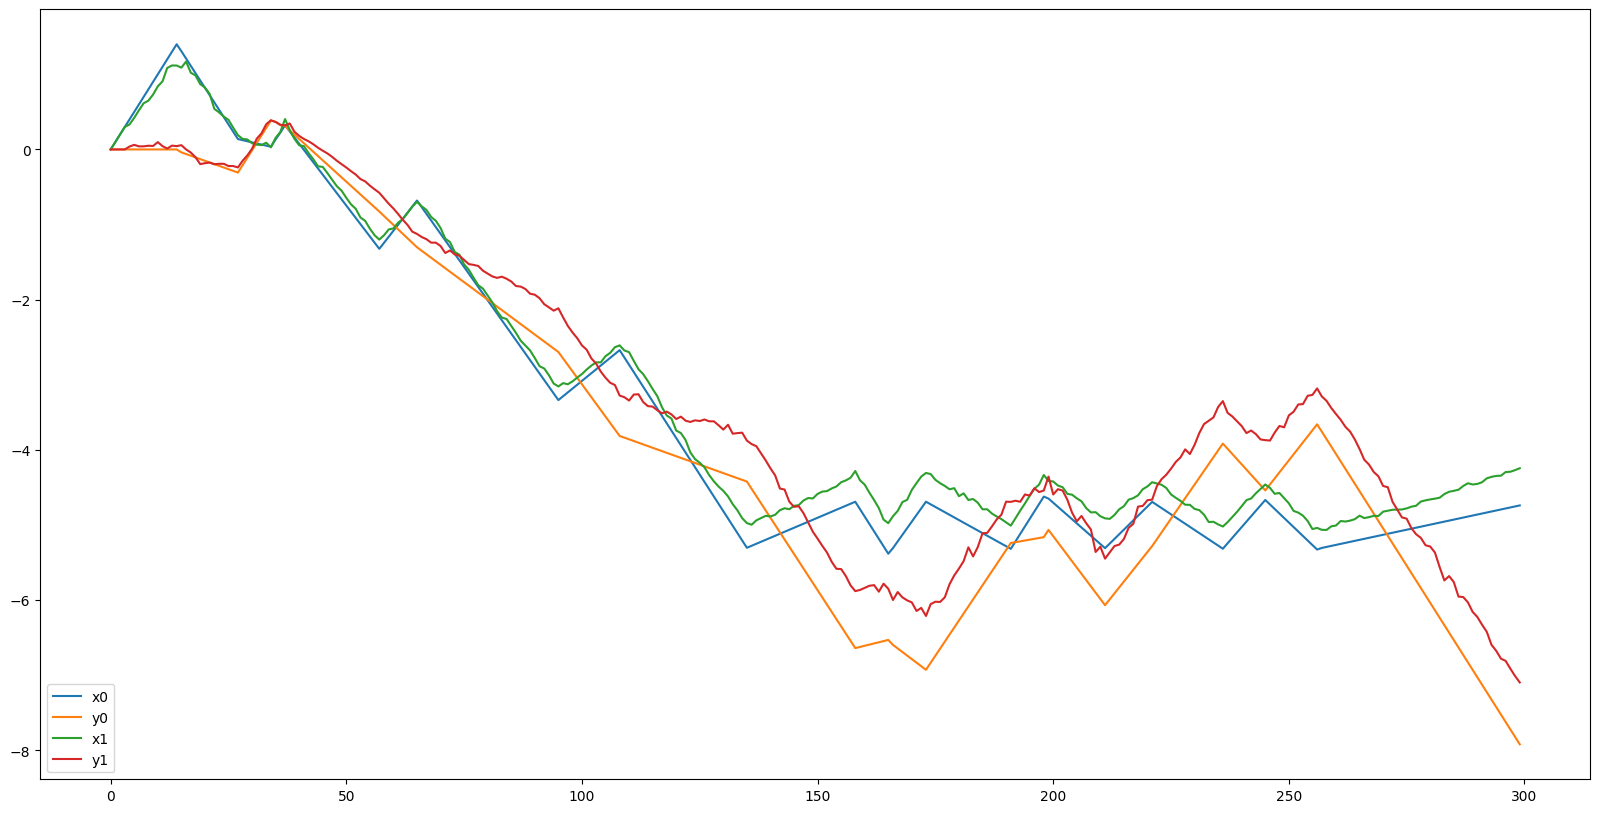

In [106]:
draw_position(data, ground_truth, axis=[0, 1])

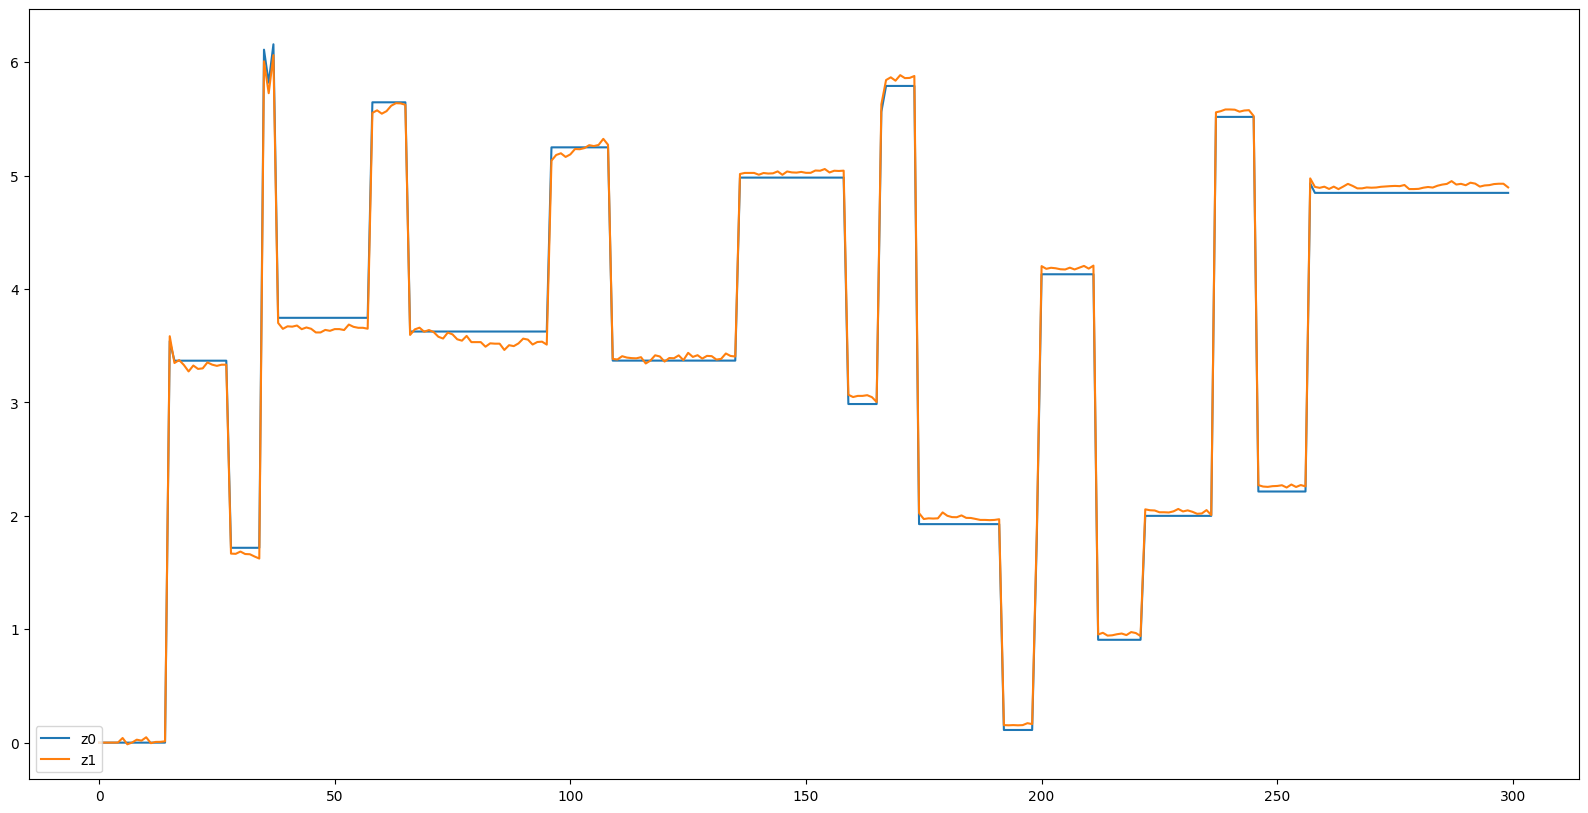

In [108]:
draw_orientation(data, ground_truth, axis=[2])

In [109]:
rmse(data, ground_truth)

0.6003851695647835

In [110]:
length(ground_truth)

30.683035431117712